In [2]:
%run my_functions.ipynb

In [3]:
sat_formula = [[1,2,-3],[-1,-2,4],[2,-4,-5],[1,-3,5],[-1,3,-4],[3,4,-5],
               [2,3,-4],[-2,-3,5]]


5 7
1
8
22


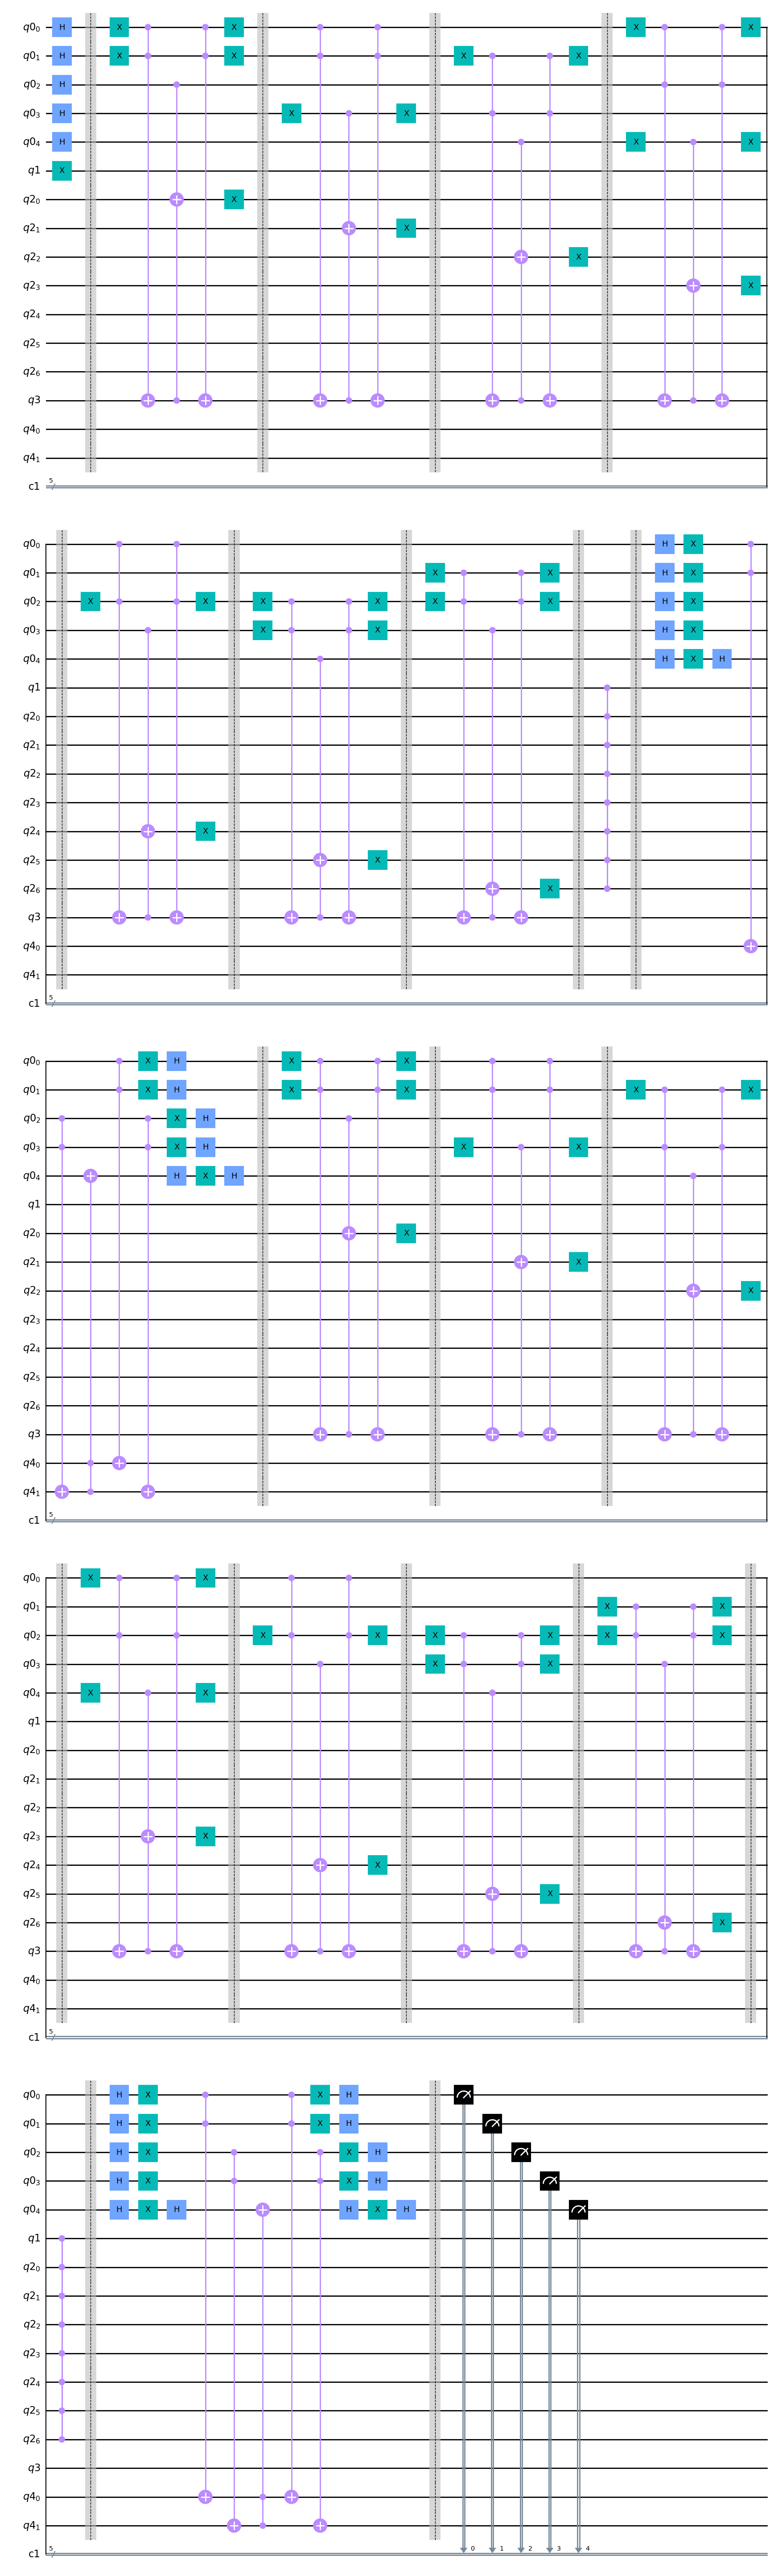

In [4]:
quant_part = []
for i in range(len(sat_formula)-1):
    quant_part += [sat_formula[i]]
qc = hybrid_sat3(quant_part)
qc.draw('mpl')

In [5]:
counts = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000).result().get_counts()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1], reverse=True)}
soln = []
all_soln = []
for key,value in counts.items():
    all_soln.append(key)
    if value>sum(counts.values())/len(counts):
        soln.append(key)

all_soln = [element[::-1] for element in all_soln]
quant_soln = [element[::-1] for element in soln]
print("Measurement results:",counts)
print("Max values above average from the dictionary:", quant_soln)

Measurement results: {'00001': 497, '00000': 479, '11110': 474, '11111': 470, '01111': 467, '00101': 460, '10110': 459, '01101': 450, '01010': 437, '00010': 433, '10101': 428, '11010': 425, '10011': 252, '11101': 246, '10001': 244, '10010': 236, '00011': 231, '10100': 230, '00100': 229, '01001': 229, '10111': 229, '00111': 229, '11000': 228, '00110': 228, '11100': 226, '01000': 223, '11011': 217, '11001': 216, '10000': 212, '01100': 208, '01011': 205, '01110': 203}
Max values above average from the dictionary: ['10000', '00000', '01111', '11111', '11110', '10100', '01101', '10110', '01010', '01000', '10101', '01011']


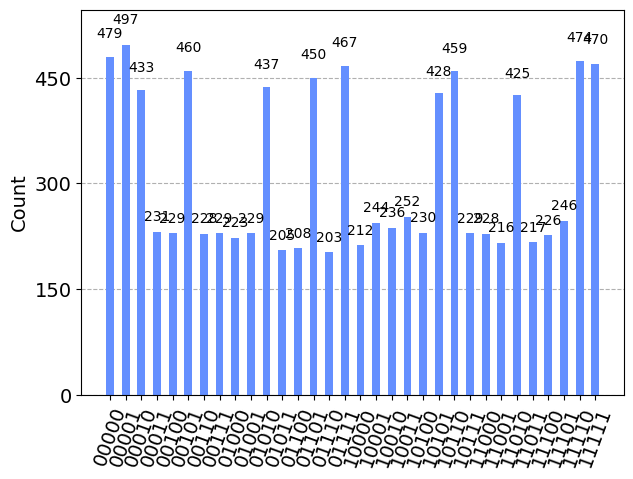

In [6]:
plot_histogram(counts)

In [7]:
brute_quant_soln = classical_sat_checker(quant_part,all_soln)
brute_full_soln = classical_sat_checker(sat_formula,all_soln)

In [8]:
print(len(brute_quant_soln))
print(len(quant_soln))

12
12


In [9]:
if quant_soln == brute_quant_soln:
    print('quant_solutions match with brute force solutions')
else:
     print('quant_solutions Do NOT match with brute force solutions')   

if len(brute_quant_soln)<len(all_soln)/2 or len(brute_quant_soln)==len(all_soln)/2:
    print('Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln')
else:
    print('Number of True solutions are more, thus quant_soln is not the same as the brute force soln')

quant_solutions match with brute force solutions
Number of True Solutions are less than number of False solutions, thus quant_soln is expected to be same as brute force soln


In [10]:
new_quant_soln = classical_sat_checker(quant_part,quant_soln)
if new_quant_soln==['No solution exists']:
    new_quant_soln = [i for i in all_soln if i not in quant_soln]
new_quant_soln

['10000',
 '00000',
 '01111',
 '11111',
 '11110',
 '10100',
 '01101',
 '10110',
 '01010',
 '01000',
 '10101',
 '01011']

In [11]:
brute_quant_soln

['10000',
 '00000',
 '01111',
 '11111',
 '11110',
 '10100',
 '01101',
 '10110',
 '01010',
 '01000',
 '10101',
 '01011']

In [12]:
if new_quant_soln == brute_quant_soln:
    print('Solution for quantum part agrees with brute force solutions')

Solution for quantum part agrees with brute force solutions


In [13]:
classical_part = [sat_formula[-1]]
sat_solution = classical_sat_checker(classical_part,new_quant_soln)
sat_solution

['10000',
 '00000',
 '01111',
 '11111',
 '10100',
 '01101',
 '10110',
 '01010',
 '01000',
 '10101',
 '01011']

In [14]:
len(brute_full_soln)

11

In [15]:
if sat_solution == brute_full_soln:
    print('Solution for the sat problem agrees with brute force solutions')
else:
    print('Solutions do not agree with brute force solutions')

Solution for the sat problem agrees with brute force solutions
